In [1]:
import numpy as np, curvedsky, prjlib, plottools as pl, tools_y, binning as bn, tools_qrec, pickle
from scipy.signal import savgol_filter
from matplotlib.pyplot import *

In [2]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)
s = mb.bc**2/2/np.pi

In [3]:
fxtau, fxtbh, fxtBH, al = {}, {}, {}, {}
for fltr in ['none','cinv']:
    p = prjlib.init_analysis(fltr=fltr,wtype='Lmask',tausig=True)
    qtau, __, __, qtbh, qtBH = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
    al[fltr] = (np.loadtxt(qtBH.f['TT'].al)).T[1]
    cy = tools_y.init_compy(p.ids,masktype=0,ytype='milca',ascale=1.0)
    fxtau[fltr] = tools_y.init_cross(qtau,cy,p.ids,p.stag)
    fxtbh[fltr] = tools_y.init_cross(qtbh,cy,p.ids,p.stag)
    fxtBH[fltr] = tools_y.init_cross(qtBH,cy,p.ids,p.stag)

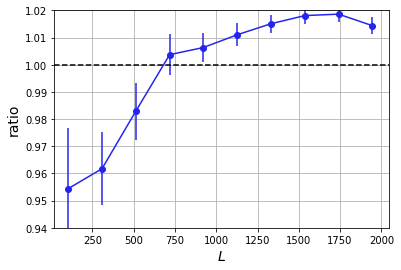

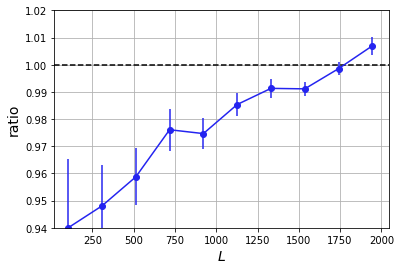

In [4]:
yy = (np.loadtxt(cy.fclyy)).T[1]
tt = prjlib.tau_spec(2048)
ty = np.sqrt(yy*tt)*.9
yy = savgol_filter( yy, 51, 3)
for fltr in ['none','cinv']:
    vl = np.sqrt(al[fltr]*yy)/np.sqrt(qtau.l+1e-30)
    mcb, vcb, scb = bn.binned_spec(mb,fxtBH[fltr].xl,cn=1,doreal=False,opt=True,vl=vl)
    cbty = bn.binning(ty,mb,vl=vl)
    pl.plot_1dstyle(ymin=.94,ymax=1.02,grid=True,ylab=r'ratio')
    errorbar(mb.bc,mcb/cbty,yerr=vcb/10./cbty,fmt='o-')
    axhline(1.,color='k',ls='--')
    show()